# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

# Importamos los datos con los atributos

In [3]:
df=pd.read_csv('../../Data/Processed/atributes_wd.csv')
df

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
0,000001.jpg,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,000002.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
3,000004.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
4,000005.jpg,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
202595,202596.jpg,0,0,0,0,1,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
202596,202597.jpg,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,0,0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,1


In [4]:
columns_names = df.columns.values
columns_names = np.delete(columns_names, 0)
contador_0 = 0
contador_1 = 0
for columnas in columns_names: 
    contador_0 = contador_0 + df[columnas].value_counts()[0]
    contador_1 = contador_1 + df[columnas].value_counts()[1]

In [5]:
print("El porcentaje de 0 en el dataframe es:", contador_0/(contador_0+contador_1)*100,"%")

El porcentaje de 0 en el dataframe es: 78.91686595195435 %


# Separamos datos de validación-entrenamiento y datos de prueba

## Creamos datos de validación-entrenamiento

In [6]:
df_tv = df.sample(frac=0.8,random_state = 1)
df_tv

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
57205,057206.jpg,0,1,0,0,0,1,0,0,1,...,1,1,0,1,0,1,0,0,1,1
75512,075513.jpg,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,1
193254,193255.jpg,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
125591,125592.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
75806,075807.jpg,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97891,097892.jpg,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
184224,184225.jpg,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
87017,087018.jpg,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
169563,169564.jpg,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Juntamos atributos e imágenes de los datos de validación-entrenamiento

In [7]:
files = tf.data.Dataset.from_tensor_slices(df_tv['Image'])
attributes = tf.data.Dataset.from_tensor_slices(df_tv.iloc[:,1:].to_numpy())
data = tf.data.Dataset.zip((files, attributes))
print(data)

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


In [8]:
path_to_images = '../../Data/Processed/img_align_celeba/'
def process_file(file_name, attributes): 
    image = tf.io.read_file(path_to_images+file_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [178,218])
    image /= 255.0 
    return image, attributes

In [9]:
labeled_images = data.map(process_file)
print(labeled_images)

<MapDataset element_spec=(TensorSpec(shape=(178, 218, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


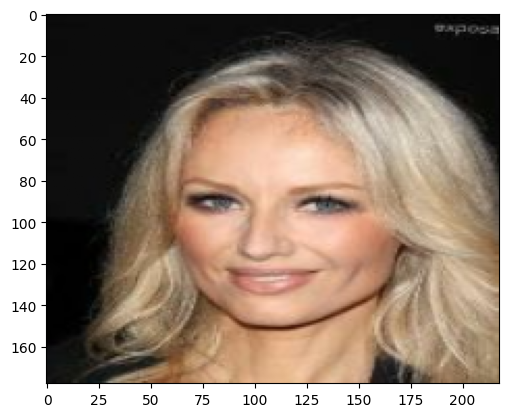

tf.Tensor([0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1], shape=(32,), dtype=int64)


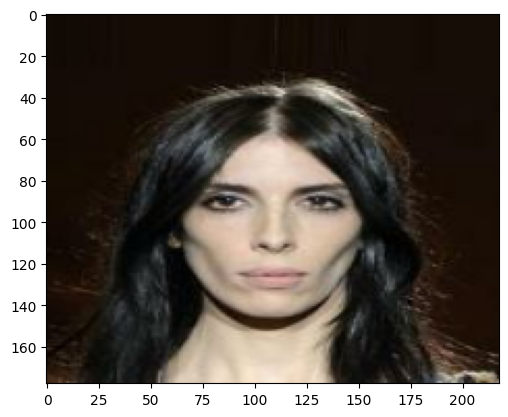

tf.Tensor([0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1], shape=(32,), dtype=int64)


In [10]:
for image, attri in labeled_images.take(2): 
    plt.imshow(image)
    plt.show()
    print(attri)

## Creamos datos de prueba

In [11]:
df_test = df.drop(df_tv.index)
df_test

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
0,000001.jpg,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
5,000006.jpg,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
7,000008.jpg,1,1,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
9,000010.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
16,000017.jpg,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202572,202573.jpg,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
202575,202576.jpg,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,1
202579,202580.jpg,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
202589,202590.jpg,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Juntamos atributos e imágenes de los datos de prueba

In [12]:
files_test = tf.data.Dataset.from_tensor_slices(df_test['Image'])
attributes_test = tf.data.Dataset.from_tensor_slices(df_test.iloc[:,1:].to_numpy())
data_test = tf.data.Dataset.zip((files_test, attributes_test))
print(data_test)

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


In [13]:
path_to_images = '../../Data/Processed/img_align_celeba/'
def process_file_test(file_name_test, attributes_test): 
    image_test = tf.io.read_file(path_to_images+file_name_test)
    image_test = tf.image.decode_jpeg(image_test, channels=3)
    image_test = tf.image.resize(image_test, [178,218])
    image_test /= 255.0 
    return image_test, attributes_test

In [14]:
labeled_images_test = data_test.map(process_file_test)
print(labeled_images_test)

<MapDataset element_spec=(TensorSpec(shape=(178, 218, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


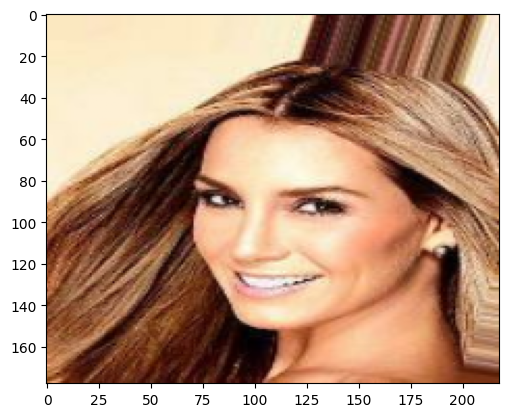

tf.Tensor([0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1], shape=(32,), dtype=int64)


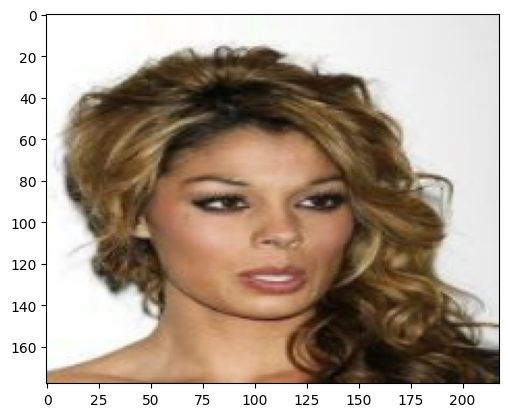

tf.Tensor([0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1], shape=(32,), dtype=int64)


In [15]:
for image_test, attri in labeled_images_test.take(2): 
    plt.imshow(image_test)
    plt.show()
    print(attri)

In [16]:
batch_size = 100
AUTOTUNE = tf.data.AUTOTUNE

def configure_for_performance(ds):
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

labeled_images_test = configure_for_performance(labeled_images_test)


# Separamos Train y Val

In [17]:
image_count = len(labeled_images)
image_count
train_size = int(image_count * 0.8)
train = labeled_images.take(train_size)
val = labeled_images.skip(train_size)
print(tf.data.experimental.cardinality(train).numpy())
print(tf.data.experimental.cardinality(val).numpy())

129663
32416


In [18]:
batch_size = 100
AUTOTUNE = tf.data.AUTOTUNE

def configure_for_performance(ds):
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train = configure_for_performance(train)
val = configure_for_performance(val)

# Creación del modelo

In [19]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
                            keras.layers.Conv2D(filters, 3, strides=strides,
                                            padding="same",use_bias=False),
                            self.activation,
                            keras.layers.Conv2D(filters, 3, strides=1,
                                            padding="same",use_bias=False)]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                          keras.layers.Conv2D(filters, 1, strides=strides,
                                              padding="same",use_bias=False)]

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'activation' : self.activation,
            'main_layers' : self.main_layers,
            'skip_layers' : self.skip_layers,})
        return config

    def call(self, inputs):
        skip_x = inputs
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        for layer in self.skip_layers:
            skip_x = layer(skip_x)
    
        return self.activation(keras.layers.add([x, skip_x]))


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[178, 218, 3],
                              padding="same", use_bias=False))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 89, 109, 64)       9408      
                                                                 
 activation (Activation)     (None, 89, 109, 64)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 55, 64)       0         
 )                                                               
                                                                 
 residual_unit (ResidualUnit  (None, 45, 55, 64)       73728     
 )                                                               
                                                                 
 residual_unit_1 (ResidualUn  (None, 45, 55, 64)       73728     
 it)                                                             
                                                        

In [22]:
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics='binary_accuracy')

In [23]:
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return 1e-3 * 0.9 ** epoch

In [24]:
epochs = 100
tf.compat.v1.global_variables_initializer()

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 7,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train, validation_data=val, epochs= epochs, callbacks=[reduce_lr, early_stop])
history = model.fit(train, validation_data=val, epochs= epochs, callbacks=[reduce_lr, early_stop],
                    steps_per_epoch=10,validation_steps=2) 

Epoch 1/100
1297/1297 [==============================] - 466s 358ms/step - loss: 0.3587 - binary_accuracy: 0.8481 - val_loss: 0.2845 - val_binary_accuracy: 0.8767 - lr: 0.0010
Epoch 2/100
1297/1297 [==============================] - 458s 353ms/step - loss: 0.2647 - binary_accuracy: 0.8847 - val_loss: 0.2494 - val_binary_accuracy: 0.8911 - lr: 0.0010
Epoch 3/100
1297/1297 [==============================] - 456s 351ms/step - loss: 0.2420 - binary_accuracy: 0.8941 - val_loss: 0.2415 - val_binary_accuracy: 0.8938 - lr: 0.0010
Epoch 4/100
1297/1297 [==============================] - 457s 353ms/step - loss: 0.2304 - binary_accuracy: 0.8990 - val_loss: 0.2362 - val_binary_accuracy: 0.8964 - lr: 0.0010
Epoch 5/100
1297/1297 [==============================] - 461s 356ms/step - loss: 0.2224 - binary_accuracy: 0.9023 - val_loss: 0.2303 - val_binary_accuracy: 0.8993 - lr: 0.0010
Epoch 6/100
1297/1297 [==============================] - 457s 352ms/step - loss: 0.2160 - binary_accuracy: 0.9051 - val_

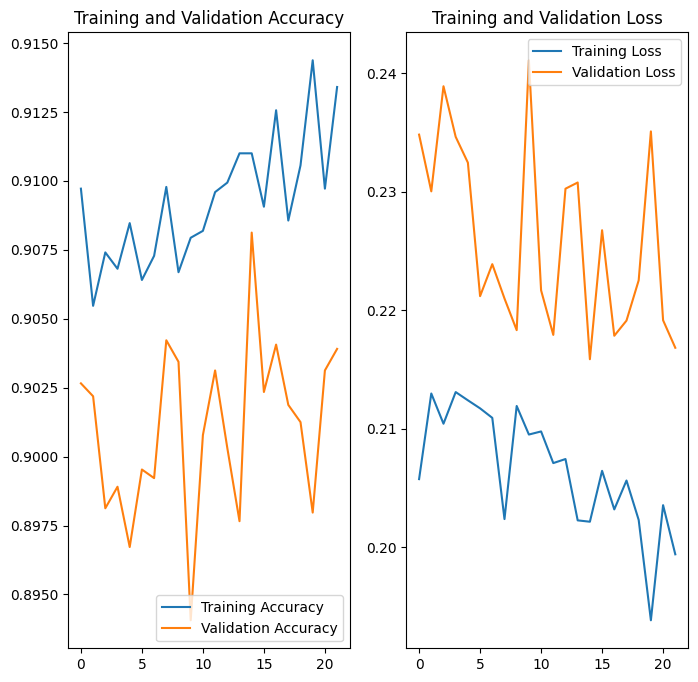

In [28]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(22)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
test_lost, test_acc= model.evaluate(labeled_images_test)
print ("Test Accuracy:", test_acc)

406/406 [==============================] - 39s 95ms/step - loss: 0.2244 - binary_accuracy: 0.9019
Test Accuracy: 0.9018594622612


In [30]:
model.save_weights('path_to_my_weights4.h5')

In [31]:
json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)

In [ ]:
new_model = keras.models.load_model('path_to_my_model4.h5')